# Data Visualization

Data visualization is a critical step in the data analysis process. It helps uncover patterns, trends, and outliers that may not be obvious in raw data. Two of the most powerful and widely used Python libraries for data visualization are Matplotlib and Seaborn.

Matplotlib is the foundational plotting library in Python, offering full control over every element of a figure — making it extremely flexible for custom visualizations (we'll also use it to do catchment areas!). Seaborn is built on top of Matplotlib and provides a higher-level interface with beautiful default styles and functions for creating informative statistical graphics with minimal code.

The basic logic of plotting in these libraries follows a simple structure:

- Prepare the data — clean and structure your data with Pandas.

- Choose the right chart type — line, bar, scatter, heatmap, etc.

- Call the appropriate function — plt.plot(), sns.barplot(), etc.

- Customize — add titles, labels, colors, legends, and styles.

- Show or save — display the chart with plt.show() or save it with plt.savefig().



In [24]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

os.chdir(r"\\cet.comp.cec.eu.int\compedmacompcet\CET\python_training\Python_CET_Crash_Course\input")

## 1. Barplots

In [91]:
# Load Titanic dataset
titanic = pd.read_csv('titanic_dataset.csv')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0.5, 1.0, 'Survival rate by class')

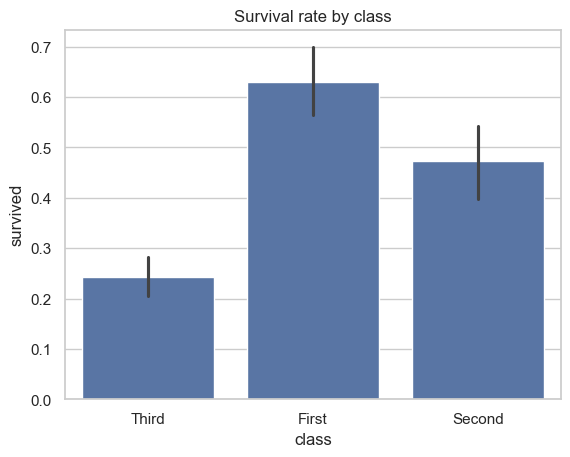

In [62]:
# Visualize survival rate by class
sns.barplot(x='class', y='survived', data=titanic)

plt.title("Survival rate by class")

Text(0.5, 1.0, 'Survival count by sex')

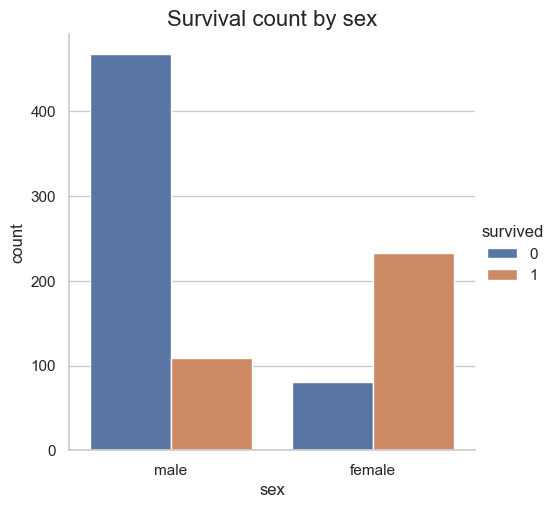

In [61]:
# Countplot
sns.catplot(x ="sex", hue ="survived", kind ="count", data = titanic)
plt.title("Survival count by sex", fontsize=16)


Clearly whether a passenger was a male or a female played an important role in determining survival.

In [64]:
# we aggregate whether survived or not by class
survival_rates = titanic.groupby("pclass")["survived"].mean().reset_index()


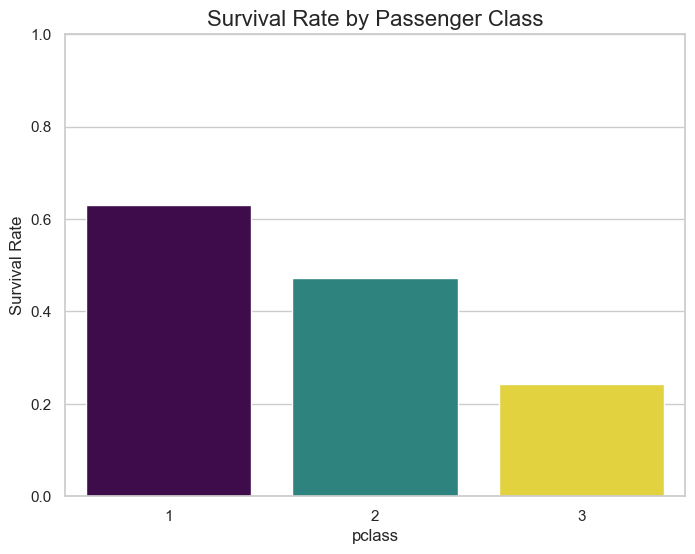

In [65]:
#plot
plt.figure(figsize=(8,6))
sns.barplot(data=survival_rates, x="pclass", y="survived", hue="pclass", palette="viridis", 
    dodge=False,           # <- prevents duplicated bars
    legend=False           # <- avoids extra legend
)

plt.title("Survival Rate by Passenger Class", fontsize=16)
plt.ylabel("Survival Rate")
plt.ylim(0,1)  # probability scale
plt.show()

## 2. Violin plots

Nice to see distribution of data across more than one variable.

Text(0.5, 1.0, 'Survival distribution by sex and age')

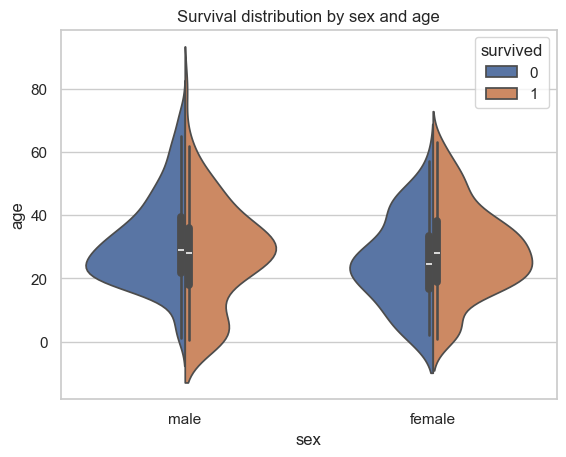

In [71]:
sns.violinplot(x ="sex", y ="age", hue ="survived", 
data = titanic, split = True)

plt.title('Survival distribution by sex and age')

Violin plot tells us the survival rate is (i) relatively ok for children, (ii) high for women in the age range 20-50 (iii) less for men as the age increases.

## 3. Catplots (previously called factorplots)

Useful to see trends across categorical variables, as it automaticvally aggregates. 

In [109]:
# Adding a column Family_Size
titanic['family_size'] = 0
titanic['family_size'] = titanic['parch']+titanic['sibsp'] # number of parents and siblings aboard


It seems if a passenger was alone, the survival rate is worse than if it wasnt. Also, if the family size is greater than 3, chances of survival decrease considerably.

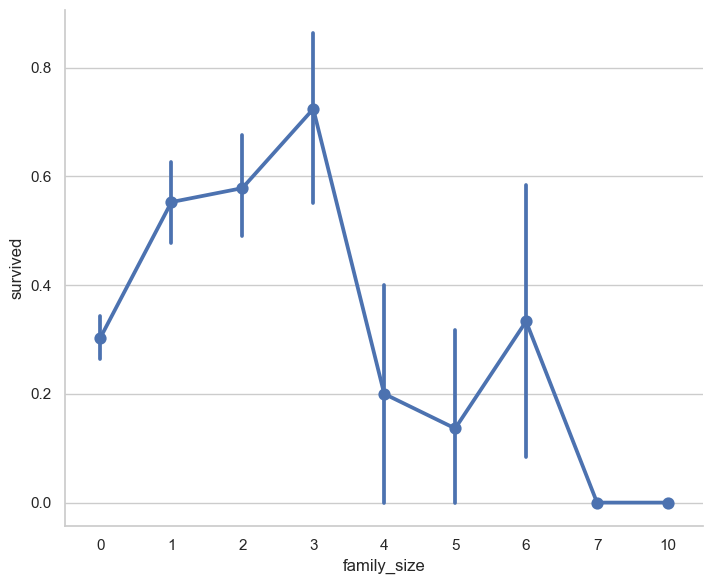

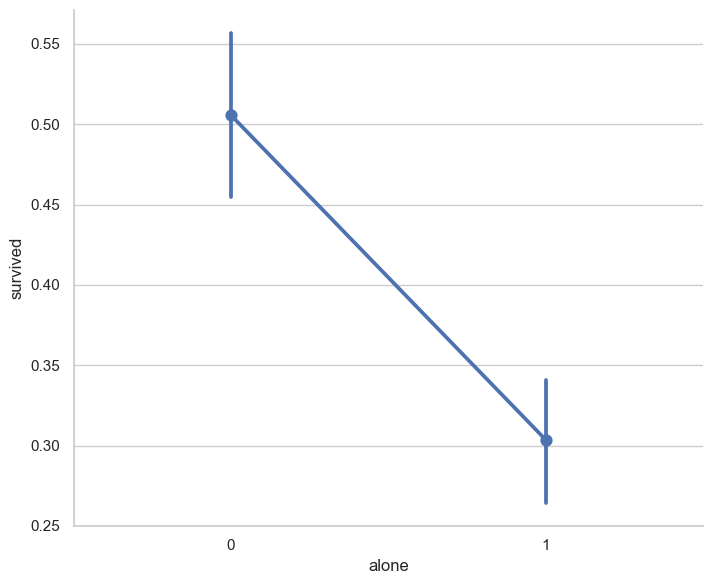

In [108]:
# catplot for Family_Size
sns.catplot(x='family_size', y='survived', data=titanic, kind='point', errorbar=('ci', 95), height=6, aspect=1.2)
# Factorplot for Alone
sns.catplot(x ='alone', y ='survived', data = titanic, kind='point', errorbar=('ci', 95), height=6, aspect=1.2)

## 4. Scatter plots

In [114]:
# we'll use another famous dataset
iris = pd.read_csv("iris_dataset.csv")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 1.0, 'Sepal length (cm) vs Petal length (cm)')

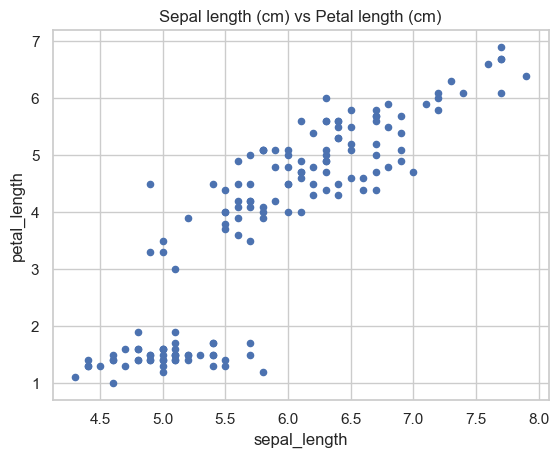

In [123]:
iris.plot(kind ="scatter",  x ='sepal_length',  y ='petal_length')

plt.title("Sepal length (cm) vs Petal length (cm)")

Scatter using "hue" makes our x, y variables capture another dimension.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

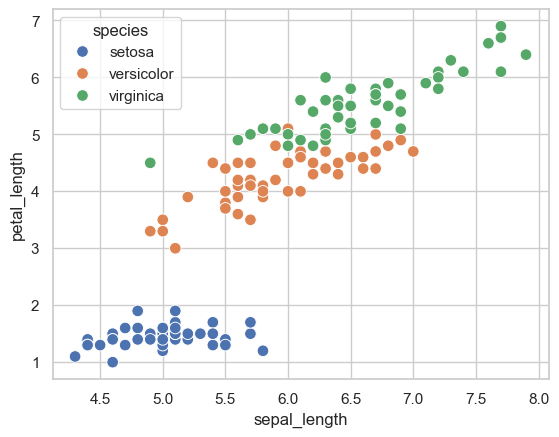

In [127]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris, s=70)

### Exercise 5: Go to the Python Graph Gallery and find a graph that you like and apply it to either titanic or iris data

https://python-graph-gallery.com/

In [ ]:
# add your code here



We go back to our transaction dataset from previous session, let's see how we can explore it while using different types of plots.

In [130]:
# we will use different datasets across the session, to make it less boring
df = pd.read_csv("transaction_data_milk_v2.csv")

# assign date as datetime object
df['date'] = pd.to_datetime(df['date'])

# extract month
df['month'] = df['date'].dt.to_period('M').astype(str)

# generate revenue
df['revenue'] = df.price_per_kg * df.volume_kg

df.head()

,transaction_id,date,company,customer_id,volume_kg,price_per_kg,cost_per_kg,product,region,month,revenue
0,0,2024-04-12,Milkand,1664,149,1.25,0.74,Dairy,South,2024-04,186.25
1,1,2024-12-14,Milkand,1089,2873,1.23,0.83,Dairy,West,2024-12,3533.79
2,2,2024-09-27,Milkand,1615,2015,1.37,0.68,Dairy,West,2024-09,2760.55
3,3,2024-04-16,Milkand,1947,2536,1.35,0.71,Dairy,North,2024-04,3423.60
4,4,2024-03-12,Milkand,1523,1904,1.23,0.78,Dairy,East,2024-03,2341.92


## 5. Lineplots

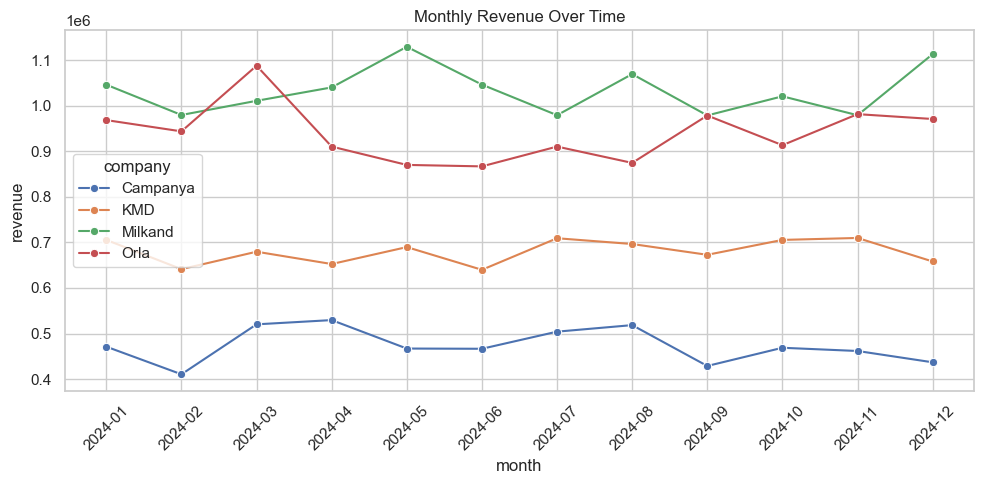

In [28]:
monthly_sales = df.groupby(['company','month'])['revenue'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month', y='revenue', marker='o', hue='company')
plt.title('Monthly Revenue Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. Stacked bar

In [5]:
# pivot table is a way of reshaping the table
pivot = df.pivot_table(index='month', columns='company', values='revenue', aggfunc='sum')

pivot

company,Campanya,KMD,Milkand,Orla
month,,,,
2024-01,471203.82,705413.80,1045948.21,968292.28
2024-02,410617.65,641265.90,979530.30,943581.59
2024-03,520218.29,679551.68,1010622.32,1087604.94
2024-04,529523.77,652522.18,1040042.86,910175.26
2024-05,467097.94,689684.19,1129157.50,869973.70
2024-06,466608.55,639850.81,1046171.29,866781.32
2024-07,504159.41,709106.56,979066.63,910217.51
2024-08,518501.03,696443.27,1069266.67,874406.00
2024-09,428871.28,672773.60,978533.68,978374.61


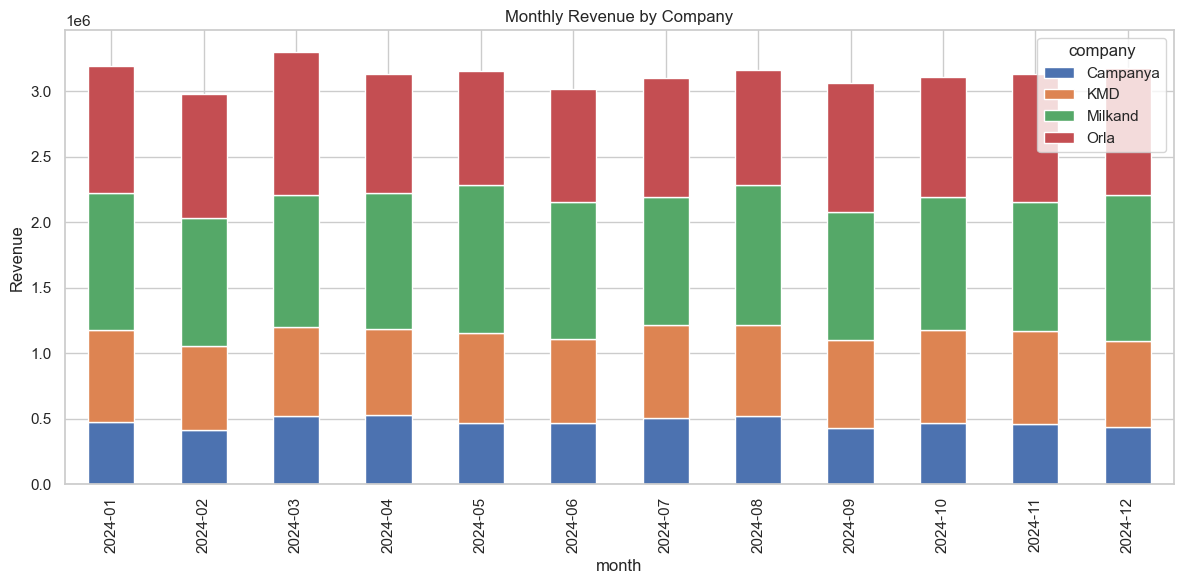

In [6]:
# plot
pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Revenue by Company')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


## 7. Histogram

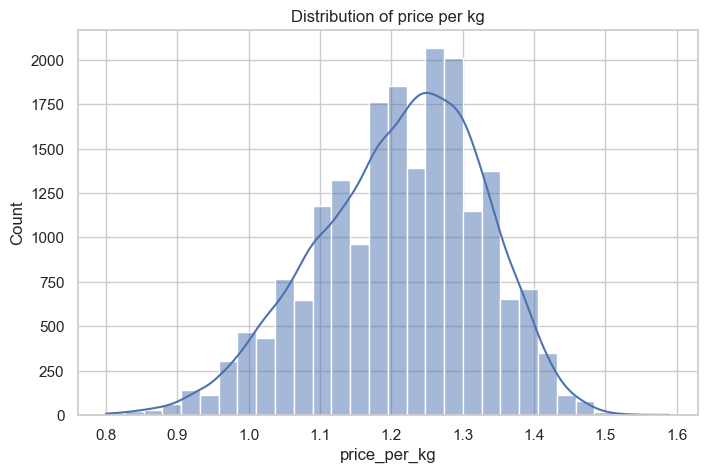

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price_per_kg'], bins=30, kde=True)
plt.title('Distribution of price per kg')
plt.show()

## 8. Box plot

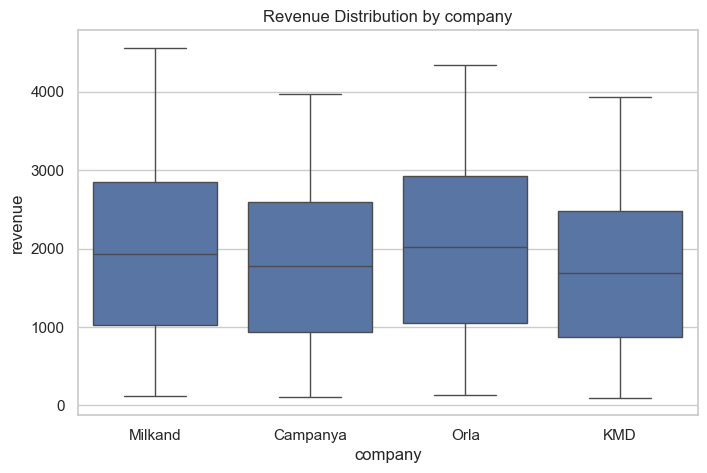

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='company', y='revenue')
plt.title('Revenue Distribution by company')
plt.show()

## 9. 3D scatter

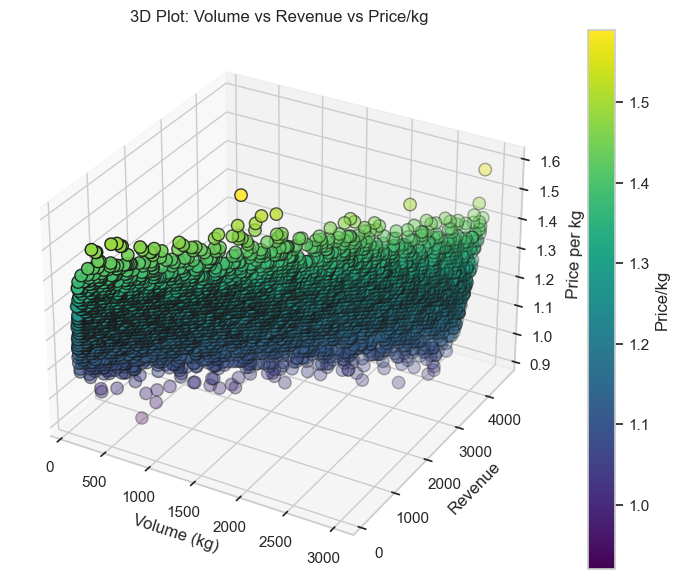

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Filter company
milkand_df = df.loc[df.company == 'Milkand']

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    milkand_df["volume_kg"],
    milkand_df["revenue"],
    milkand_df["price_per_kg"],
    c=milkand_df["price_per_kg"],   # color by price_per_kg
    cmap="viridis",
    s=80,
    edgecolor="k"
)

# Labels
ax.set_xlabel("Volume (kg)")
ax.set_ylabel("Revenue")
ax.set_zlabel("Price per kg")
ax.set_title("3D Plot: Volume vs Revenue vs Price/kg")

# Add colorbar
fig.colorbar(sc, ax=ax, label="Price/kg")

plt.show()

## 10. Pie chart

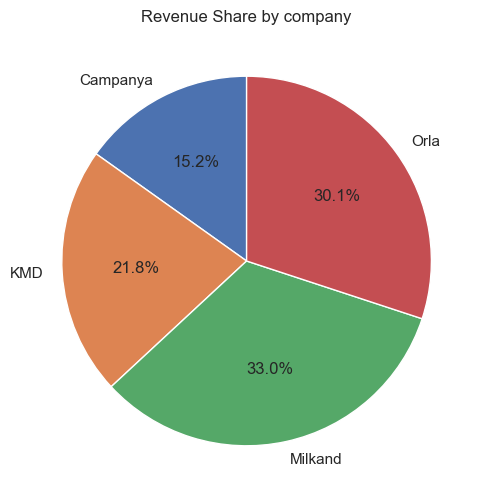

In [11]:
# Total revenue per firm
agg = df.groupby('company')[['revenue']].sum()
market_shares = agg['revenue'] / agg['revenue'].sum()

#plot
plt.figure(figsize=(6, 6))
market_shares.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by company')
plt.ylabel('')
plt.show()

## 11. Regression

In [12]:
#We'll use a different dataset.
data = pd.read_csv(r"\\cet.comp.cec.eu.int\compedmacompcet\CET\python_training\Python_CET_Crash_Course\input\demo_regression_timeseries.csv")

data.head()

,date,x,y,revenue
0,2023-01-01,0.000000,2.027862,94.374589
1,2023-01-02,0.054945,7.222905,101.744100
2,2023-01-03,0.109890,10.465779,118.201586
3,2023-01-04,0.164835,10.894244,101.005045
4,2023-01-05,0.219780,8.628794,122.467850


### Linear regression

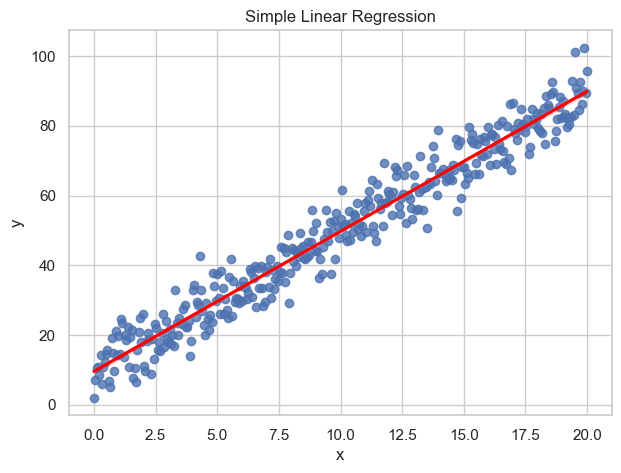

In [13]:
plt.figure(figsize=(7,5))
sns.regplot(data=data, x="x", y="y", line_kws={"color":"red"})
plt.title("Simple Linear Regression")
plt.show()

### ACF & PACF plots

How does revenue today depend on its own past values?

<Figure size 700x500 with 0 Axes>

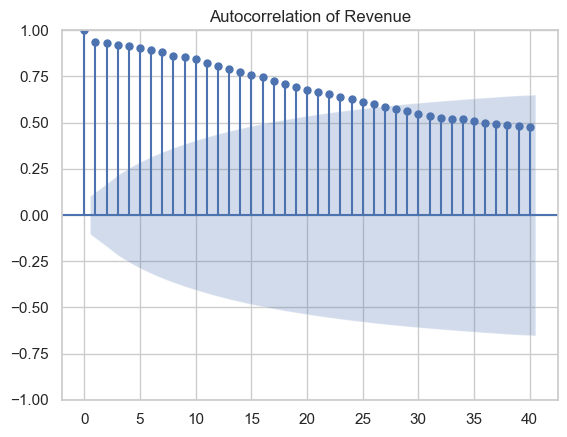

<Figure size 700x500 with 0 Axes>

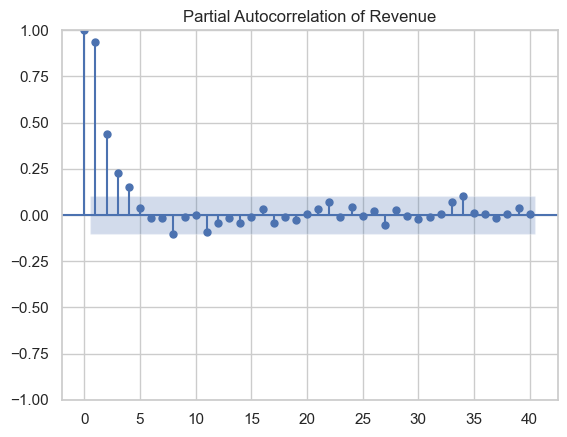

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(7,5))
plot_acf(data["revenue"], lags=40)
plt.title("Autocorrelation of Revenue")
plt.show()

plt.figure(figsize=(7,5))
plot_pacf(data["revenue"], lags=40, method="ywm")
plt.title("Partial Autocorrelation of Revenue")
plt.show()

#Does the past explain the present (and how many lags matter)?